In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import matplotlib.font_manager as fm  
import seaborn as sns  
import yfinance as yf 
from datetime import datetime, timedelta  

plt.style.use('seaborn-v0_8')  
plt.rcParams['figure.figsize'] = (14, 7)  
plt.rcParams['font.size'] = 12  

pd.set_option('display.max_columns', None) 


In [ ]:
ticker_symbol = "GRRR"  

stock_data = yf.download(ticker_symbol, period="3y", group_by='column')  
print("Raw Data：") 
print(stock_data.head()) 

stock_data.columns = stock_data.columns.get_level_values(0)  
print("Flattened info：")  
print(stock_data.head())  

stock_data.to_csv(f"data/{ticker_symbol}_past_year_stock_data.csv") 
print(f"{ticker_symbol} past 1 year stock data downloaded and saved to CSV file.") 

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
Raw Data：
Price            Close        High         Low        Open Volume
Ticker            GRRR        GRRR        GRRR        GRRR   GRRR
Date                                                             
2022-04-18  101.199997  101.300003  101.099998  101.099998  12860
2022-04-19  101.199997  101.300003  101.199997  101.199997   4190
2022-04-20  101.199997  101.300003  101.199997  101.300003    100
2022-04-21  101.199997  101.199997  101.099998  101.199997    570
2022-04-22  101.199997  101.199997  101.199997  101.199997    250
Flattened info：
Price            Close        High         Low        Open  Volume
Date                                                              
2022-04-18  101.199997  101.300003  101.099998  101.099998   12860
2022-04-19  101.199997  101.300003  101.199997  101.199997    4190
2022-04-20  101.199997  101.300003  101.199997  101.300003     100
2022-04-21  101.199997  101.199997  101.099998  

In [ ]:
print("Data Shape:", stock_data.shape)  
print("\nData Type:")  
print(stock_data.dtypes)  
print("Statistic Summary:")  
stock_data.describe()  

Data Shape: (754, 5)

Data Type:
Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object
Statistic Summary:


Price,Close,High,Low,Open,Volume
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,40.186432,42.095771,38.609110,40.164642,6.947498e+05
std,45.797688,49.563162,43.064401,44.843886,1.712808e+06
min,2.240000,2.340000,2.090000,2.100000,0.000000e+00
25%,5.890000,6.174000,5.702500,5.935000,4.395000e+03
50%,17.600000,18.400000,16.799999,17.565001,5.721500e+04
75%,80.649998,82.450001,77.914997,80.000000,3.582975e+05
max,362.200012,510.000000,250.100006,300.899994,1.602431e+07


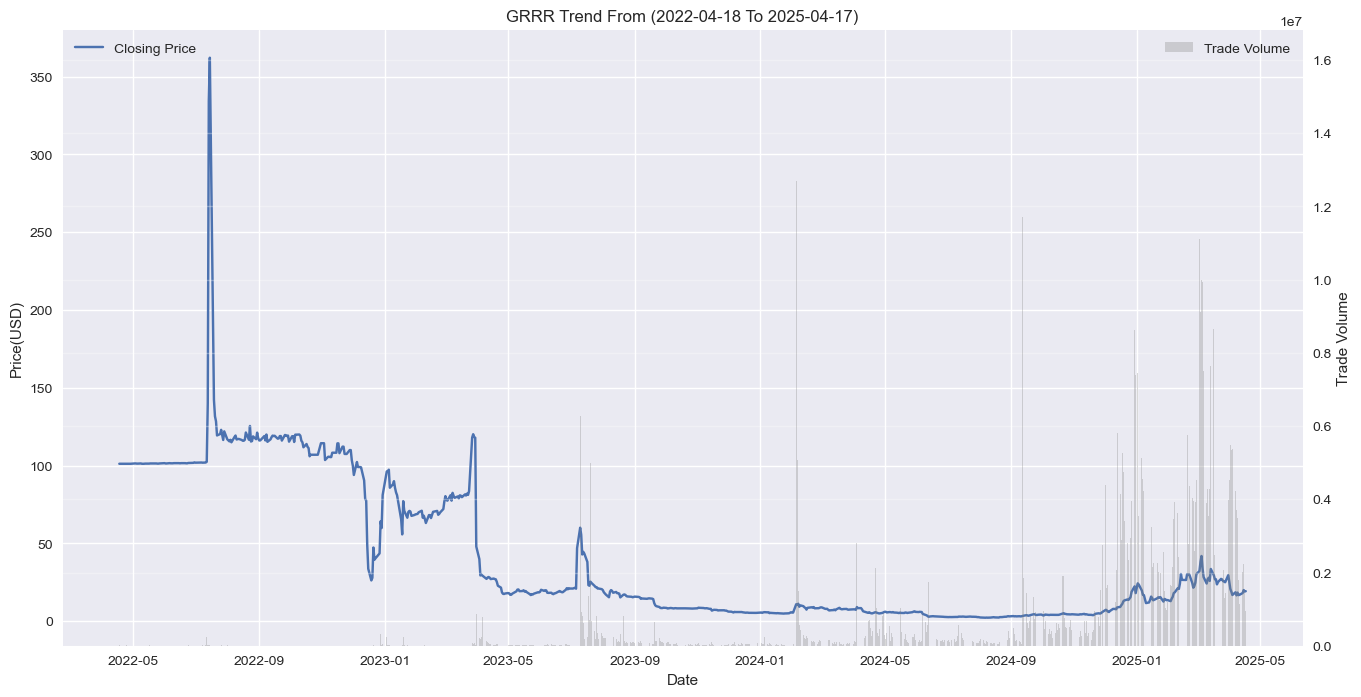

In [5]:
start_date = stock_data.index[0]
end_date = stock_data.index[-1]

plt.figure(figsize=(16, 8))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price')

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.bar(stock_data.index, stock_data['Volume'], alpha=0.3, color='gray', label='Trade Volume')
ax2.set_ylabel('Trade Volume')

plt.title(f'{ticker_symbol} Trend From ({start_date.date()} To {end_date.date()})')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price(USD)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True, alpha=0.3)
plt.show()

In [6]:
stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

period = 14
delta = stock_data['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
avg_loss = loss.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
stock_data['RSI14'] = rsi

rolling_std = stock_data['Close'].rolling(window=20).std()
stock_data['BB_middle'] = stock_data['Close'].rolling(window=20).mean()
stock_data['BB_upper'] = stock_data['BB_middle'] + (rolling_std * 2)
stock_data['BB_lower'] = stock_data['BB_middle'] - (rolling_std * 2)

stock_data.tail()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,SMA200,RSI14,BB_middle,BB_upper,BB_lower
Date,,,,,,,,,,,,
2025-04-11,16.990000,17.268999,16.084999,16.680,1130300,23.0550,24.6300,10.748775,40.401122,23.0550,32.134901,13.975099
2025-04-14,18.110001,19.416000,17.450001,18.400,2016300,22.4865,24.7204,10.825075,42.597592,22.4865,31.292245,13.680755
2025-04-15,20.010000,20.150000,18.441000,18.920,2231900,22.1405,24.8626,10.910925,46.218674,22.1405,30.752786,13.528214
2025-04-16,19.120001,19.200001,17.850000,19.025,1525300,21.7480,24.9554,10.992675,44.793257,21.7480,30.146405,13.349595
2025-04-17,19.290001,19.790001,18.511000,19.400,940700,21.5290,25.0278,11.075825,45.141285,21.5290,29.944789,13.113211


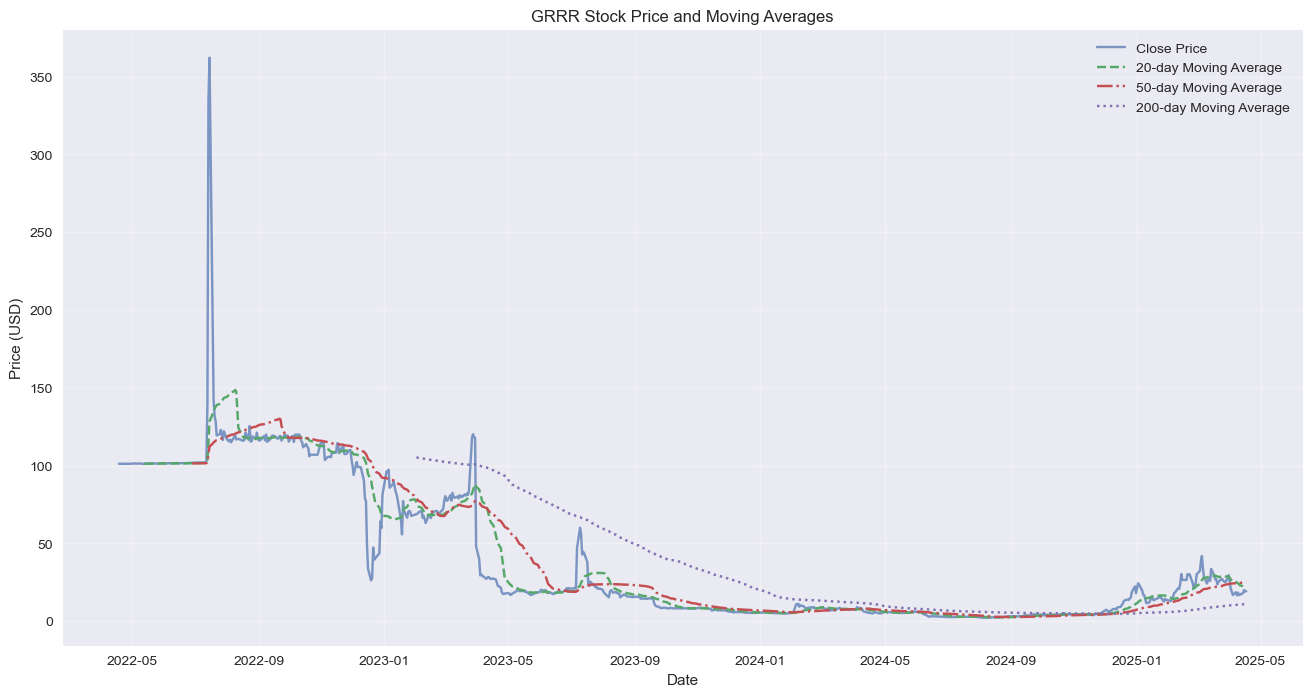

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day Moving Average', linestyle='--')
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day Moving Average', linestyle='-.')
plt.plot(stock_data.index, stock_data['SMA200'], label='200-day Moving Average', linestyle=':')

plt.title(f'{ticker_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
